#### Table of content
- <a hreaf="#choropleth">Choropleth</a>
- <a hreaf="#interctive_choropleth">Interctive choropleth</a>
- <a hreaf="#points_on_map">Points on map</a>
- <a hreaf="#interavtive_points_on_map">Interavtive points on map</a>
- <a hreaf="#cartogram_heatmap">Cartogram heatmap</a>

#### Libraries

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import folium
import folium.plugins
import io
from PIL import Image

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

import warnings
warnings.filterwarnings('ignore')

<h1 id="choropleth">Choropleth</h1>

Sources:
- <a href="https://residentmario.github.io/geoplot/">Geoplot docs</a>

In [33]:
geodata = gpd.read_file("data/geojson/vivoderships.geojson")
geodata.rename(columns={"nazwa": "wojewodztwo"}, inplace=True)
data = pd.read_csv("data/vivoderships.csv")

merged_data = pd.merge(data, geodata, on="wojewodztwo")
merged_data = gpd.GeoDataFrame(merged_data, geometry=merged_data['geometry'])
merged_data.head(3)

,wojewodztwo,zageszczenie,id,geometry
0,dolnośląskie,145,8,"POLYGON ((16.41620 51.78490, 16.41900 51.78500..."
1,kujawsko-pomorskie,112,6,"POLYGON ((18.67680 53.69070, 18.67850 53.69080..."
2,lubelskie,81,15,"POLYGON ((21.89000 51.92840, 21.88740 51.92910..."


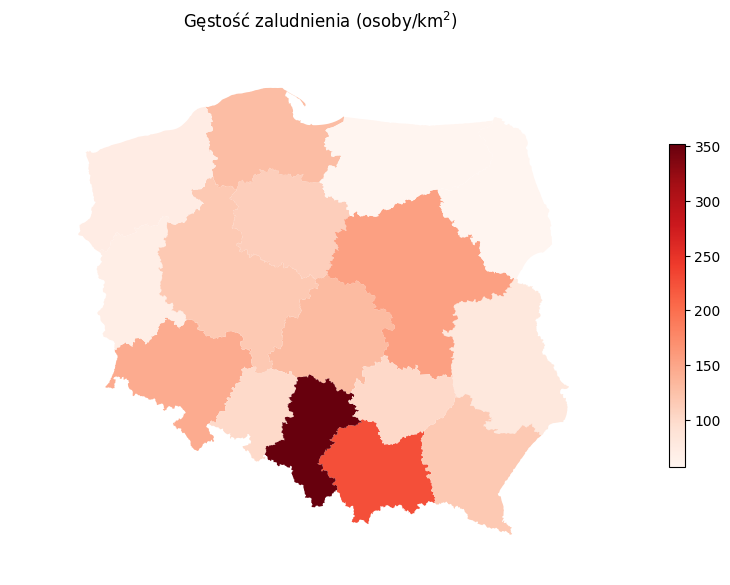

In [200]:
gplt.choropleth(
    merged_data,
    hue='zageszczenie',
    projection=gcrs.AlbersEqualArea(),
    figsize=(10, 7),
    cmap="Reds",
    legend=True,
    legend_kwargs={
        "shrink": 0.6
    }
)
plt.title(r"Gęstość zaludnienia ($\text{osoby} / \text{km}^2$)")
plt.show()

<h1 id="interctive_choropleth">Interctive choropleth</h1>

Sources:
- <a href="https://python-visualization.github.io/folium/latest/user_guide/geojson/choropleth.html">Folium docs</a>

In [116]:
geodata = gpd.read_file("data/geojson/vivoderships.geojson")
geodata.rename(columns={"nazwa": "wojewodztwo"}, inplace=True)
data = pd.read_csv("data/vivoderships.csv")

In [117]:
fig = folium.Figure(width=800, height=600)
map = folium.Map(location=[52, 19], zoom_start=6).add_to(fig)
folium.Choropleth(
    geo_data=geodata,
    data=data,
    columns=["wojewodztwo", "zageszczenie"],
    key_on="feature.properties.wojewodztwo",
    fill_color='YlOrRd',
    fill_opacity=0.75,
    line_weight=1,
    line_opacity=0.2,
    legend_name="Density by Wojewodztwo"
).add_to(map)

map

<h1 id="points_on_map">Points on map</h1>

In [113]:
geodata = gpd.read_file("data/geojson/vivoderships.geojson")
geodata.rename(columns={"nazwa": "wojewodztwo"}, inplace=True)

cities = pd.read_csv("data/polish_cities.csv")
cities = gpd.GeoDataFrame(cities, geometry=gpd.points_from_xy(cities.longitude, cities.latitude), crs="EPSG:4326")
cities.drop(["latitude", "longitude"], axis=1, inplace=True)

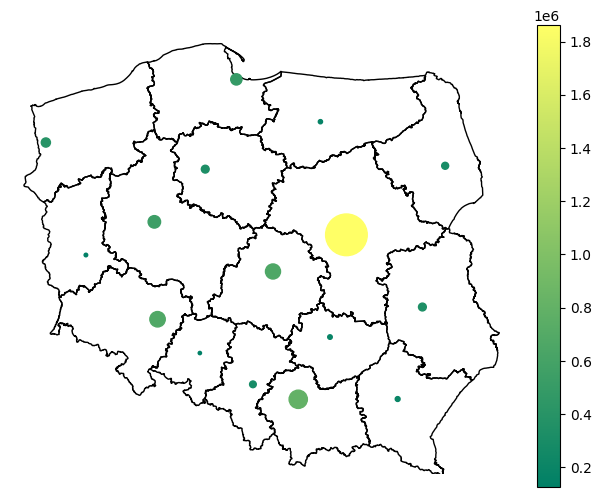

In [115]:
ax = gplt.polyplot(
    geodata,
    projection=gcrs.AlbersEqualArea()
)
gplt.pointplot(
    cities,
    ax=ax,
    extent=geodata.total_bounds,
    hue="populacja",
    cmap="summer",
    legend=True,
    scale="populacja",
    limits=(cities.populacja.min()/cities.populacja.max()*35, 30)
)
plt.show()

<h1 id="interavtive_points_on_map">Interavtive points on map</h1>

Sources:
- <a href="https://fontawesome.com/icons?d=gallery">List of all icons</a>

In [135]:
geodata = gpd.read_file("data/geojson/vivoderships.geojson")
geodata.rename(columns={"nazwa": "wojewodztwo"}, inplace=True)

cities = pd.read_csv("data/polish_cities.csv")

In [145]:
fig = folium.Figure(width=800, height=600)
map = folium.Map(location=[52, 19], zoom_start=6).add_to(fig)

folium.Choropleth(
    geo_data=geodata,
    fill_opacity=0,
    line_weight=1,
    line_opacity=0.5
).add_to(map)

for i in range(len(cities)):
    popup_text = f"<center>{cities.loc[i, "city"]}<br>Population: {cities.loc[i, "population"]}</center>"
    folium.Marker(
        location=(cities.loc[i, "latitude"], cities.loc[i, "longitude"]),
        popup=folium.Popup(popup_text, max_width=100),
        icon=folium.Icon(color="red", icon="city", prefix="fa")
    ).add_to(map)

map

<h1 id="cartogram_heatmap">Cartogram heatmap</h1>

Source:
- <a href="https://www.kaggle.com/datasets/michaltajchert/zabka-shop-location-data">data</a>
- Other map styles <a href="https://deparkes.co.uk/2016/06/10/folium-map-tiles/">here</a> or
<a href="https://python-visualization.github.io/folium/latest/user_guide/raster_layers/tiles.html#Custom-tiles">here</a>

In [163]:
geodata = gpd.read_file("data/geojson/vivoderships.geojson")
geodata.rename(columns={"nazwa": "wojewodztwo"}, inplace=True)
zabka = pd.read_csv("data/zabka_shops.csv")
zabka = zabka[["id", "lat", "lng"]]
zabka.dropna(inplace=True)
zabka = np.array([
    zabka.lat.to_numpy(),
    zabka.lng.to_numpy(),
    np.ones(len(zabka))
]).T.tolist()

In [198]:
fig = folium.Figure(width=800, height=600)
map = folium.Map(location=[52, 19], zoom_start=6, tiles="Cartodbdark_matter").add_to(fig)
folium.plugins.HeatMap(zabka, min_opacity=0.5, blur=10, radius=10).add_to(map)

map